1. 의사결정나무(Decision Tree)

In [55]:
import pandas as pd
churn = pd.read_csv('../Dataset.csv')
print(churn.head())

   Surname  CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0     2023        668.0  33.0     3.0       0.00            2.0          1   
1     2024        627.0  33.0     1.0       0.00            2.0          1   
2     1236        678.0  40.0    10.0       0.00            2.0          1   
3     1362        581.0  34.0     2.0  148882.54            1.0          1   
4      491        716.0  33.0     5.0       0.00            2.0          1   

   IsActiveMember  EstimatedSalary  Exited  ...  France  Germany  Spain  \
0               0        181449.97       0  ...       1        0      0   
1               1         49503.50       0  ...       1        0      0   
2               0        184866.69       0  ...       1        0      0   
3               1         84560.88       0  ...       1        0      0   
4               1         15068.83       0  ...       0        0      1   

   Female  Male  Mem__no__Products  Cred_Bal_Sal   Bal_sal  Tenure_Age  \
0     

In [56]:
print(churn.info())
print(churn.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [57]:
# 1. Germany 데이터만 사용하도록 데이터를 필터링하세요. 
german_df = churn.query('Germany == 1')
print(german_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37114 entries, 5 to 175020
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             37114 non-null  int64  
 1   CreditScore         37114 non-null  float64
 2   Age                 37114 non-null  float64
 3   Tenure              37114 non-null  float64
 4   Balance             37114 non-null  float64
 5   NumOfProducts       37114 non-null  float64
 6   HasCrCard           37114 non-null  int64  
 7   IsActiveMember      37114 non-null  int64  
 8   EstimatedSalary     37114 non-null  float64
 9   Exited              37114 non-null  int64  
 10  Surname_tfidf_0     37114 non-null  float64
 11  Surname_tfidf_1     37114 non-null  float64
 12  Surname_tfidf_2     37114 non-null  float64
 13  Surname_tfidf_3     37114 non-null  float64
 14  Surname_tfidf_4     37114 non-null  float64
 15  France              37114 non-null  int64  
 16  Germany 

In [58]:
# 2. 의사결정트리 모델을 fitting 하세요. 
## max_depth=5 로 설정하세요.
## train, test split 없이 모든 데이터를 사용하세요.
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier(max_depth=5)
scale = StandardScaler()
#encoder = OneHotEncoder()
target = german_df['Exited']
feat = german_df.drop(['Exited'],axis=1)
feat = feat.apply(lambda x : scale(x) if x.dtypes == int() else x)
pred = model.fit(feat,target)
print(pred.predict(feat))
print(pred.score(feat,target))


[0 0 0 ... 0 0 0]
0.7825079484830522


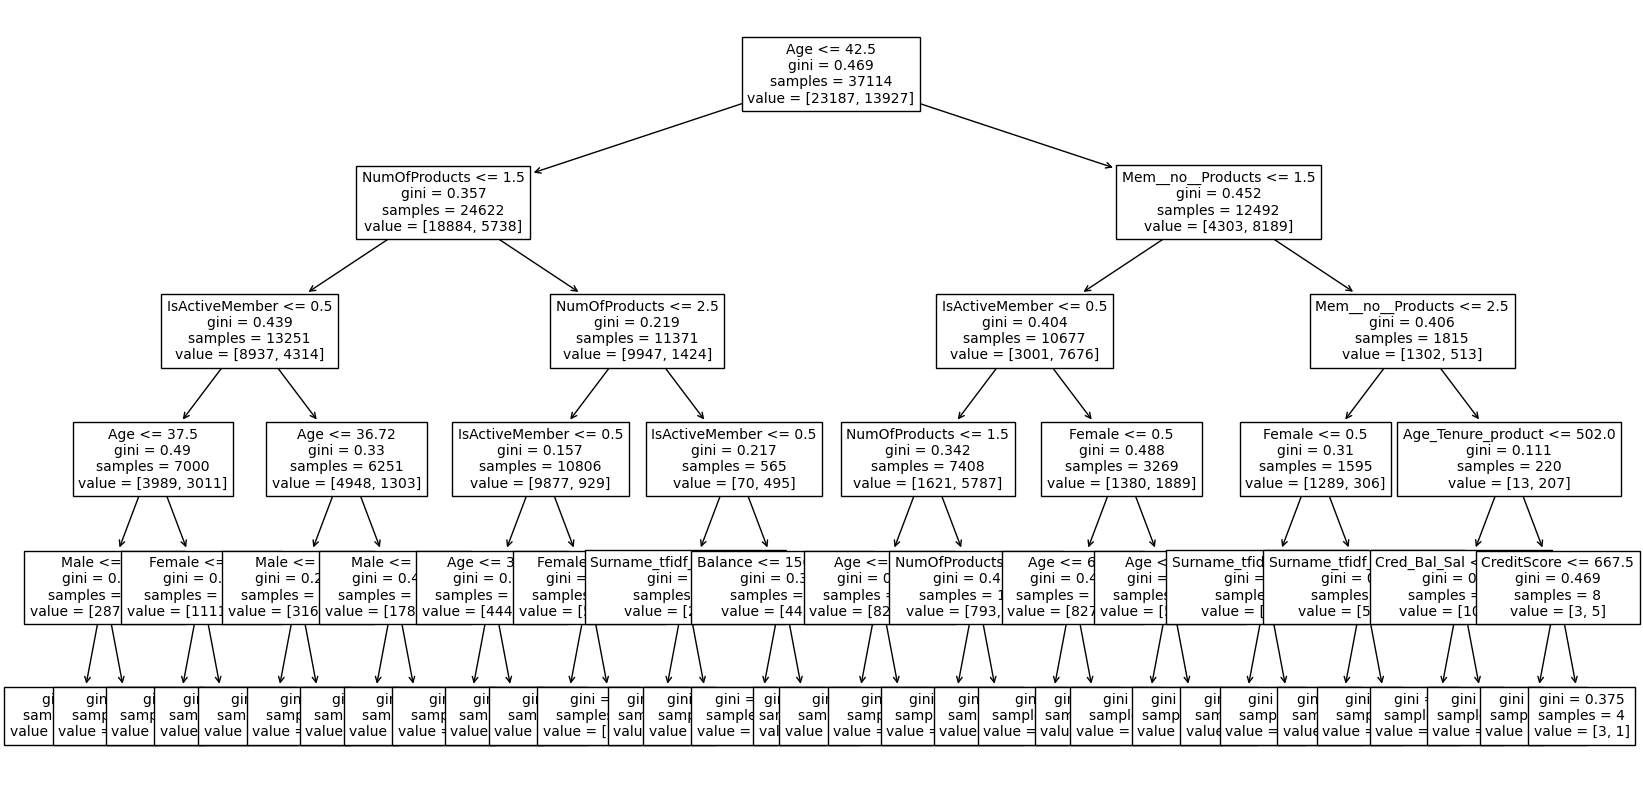

In [59]:
# 3. 의사결정트리 결과를 plot_tree를 활용해 시각화 하세요. 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plot = plot_tree(model,feature_names=list(feat.columns),fontsize=10)
plt.show()

In [60]:
# 4. 특성중요도(feature importance)를 구하세요. 
importance = pred.feature_importances_
importance_df = pd.DataFrame({
    'col':feat.columns,
    'importance':importance
})
print(importance_df.sort_values('importance',ascending=False))

                   col  importance
2                  Age    0.512751
5        NumOfProducts    0.242739
19   Mem__no__Products    0.126991
7       IsActiveMember    0.086284
17              Female    0.014239
18                Male    0.014016
4              Balance    0.000822
10     Surname_tfidf_1    0.000794
13     Surname_tfidf_4    0.000408
1          CreditScore    0.000354
12     Surname_tfidf_3    0.000273
23  Age_Tenure_product    0.000261
20        Cred_Bal_Sal    0.000069
11     Surname_tfidf_2    0.000000
9      Surname_tfidf_0    0.000000
14              France    0.000000
15             Germany    0.000000
16               Spain    0.000000
8      EstimatedSalary    0.000000
6            HasCrCard    0.000000
3               Tenure    0.000000
21             Bal_sal    0.000000
22          Tenure_Age    0.000000
0              Surname    0.000000


2. K-평균군집분석(K-means Clustering)

In [61]:
wine = pd.read_csv('../wine-clustering.csv')
print(wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [62]:
# 1. 'Alcohol', 'Malic_Acid' 2개 feature만 사용하도록 필터링하세요.
feat = wine[['Alcohol','Malic_Acid']]
print(feat)

     Alcohol  Malic_Acid
0      14.23        1.71
1      13.20        1.78
2      13.16        2.36
3      14.37        1.95
4      13.24        2.59
..       ...         ...
173    13.71        5.65
174    13.40        3.91
175    13.27        4.28
176    13.17        2.59
177    14.13        4.10

[178 rows x 2 columns]


In [63]:
# 2. features를 스케일링 하세요. 
scale = StandardScaler()
scaled_feat = scale.fit_transform(feat)
print(scaled_feat)

[[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]
 [ 1.48155459 -0.51736664]
 [ 1.71625494 -0.4186237 ]
 [ 1.3086175  -0.16727801]
 [ 2.25977152 -0.62508622]
 [ 1.0615645  -0.88540853]
 [ 1.3580281  -0.15830138]
 [ 1.38273339 -0.76871232]
 [ 0.92568536 -0.54429654]
 [ 2.16095032 -0.54429654]
 [ 1.70390229 -0.4186237 ]
 [ 0.77745356 -0.47248348]
 [ 1.60508109 -0.37374054]
 [ 1.02450655 -0.68792264]
 [ 1.46920194 -0.66996938]
 [ 0.78980621  0.68550197]
 [ 1.3086175  -0.63406285]
 [-0.08723191  1.31386618]
 [ 0.87627476 -0.42760033]
 [-0.18605311 -0.66099274]
 [ 0.61686912 -0.47248348]
 [ 0.06099988 -0.25704433]
 [ 0.48098997 -0.50839001]
 [ 0.36981612 -0.55327317]
 [ 1.07391715 -0.3916938 ]
 [ 1.2592069  -0.58917969]
 [ 0.90098006 -0.75075906]
 [ 0.71569031 -0.60713296]
 [ 0.83921681 -0.45453022]
 [ 0.93803801 -0.72382916]
 [ 0.62922177 -0.48146012]
 [ 0.59216382 -0.47248348]
 [ 0.34511082 -0.62508622]
 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

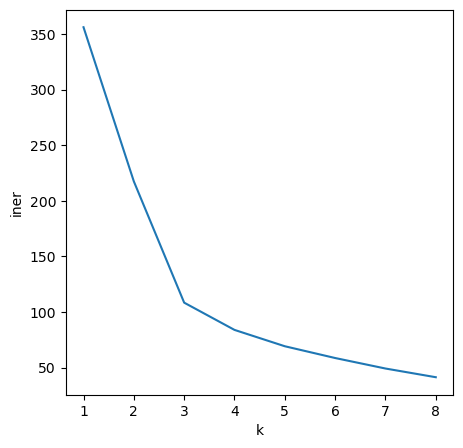

In [64]:
# 3. 적절한 K를 찾기 위한, Scree plot을 그리세요. 

from sklearn.cluster import KMeans
ks = range(1,9)
iners = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_feat)
    iner = model.inertia_
    iners.append(iner)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(ks,iners)
plt.xlabel('k')
plt.ylabel('iner')
plt.xticks(ks)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 5 6 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 7 1 5 5 5 5 5 1 1 1 5 1 1 5 5 5
 5 5 7 5 7 1 7 5 7 7 1 1 1 5 1 1 1 1 5 1 5 1 0 0 0 1 0 0 0 5 0 5 0 0 1 5 5
 0 4 5 4 0 2 0 5 0 7 0 0 0 4 4 0 4 0 0 6 4 0 4 0 0 2 4 0 6 4 0 6 0 5 0 4 2
 6 4 4 0 4 4 0 6 2 4 4 2 3 2 4 0 4 0 2 5 6 6 2 0 6 2 3 7 6 6 6 7 3 2 7 3 3
 7 7 7 6 5 7 0 3 7 6 1 5 2 7 6 6 7 7 7 6 1 3 2 6 1 3 7 7 6 7]
[1.518612540989146, 0.24628962701505472, 0.19687902841412025, 1.6915496360924187, 0.2957002256159914, 1.481554592038443, 1.7162549353928882, 1.30861749693517, 2.2597715200031785, 1.061564503930491, 1.3580280955361046, 1.3827333948365716, 0.925685357777919, 2.160950322801307, 1.7039022857426547, 0.7774535619751135, 1.6050810885407834, 1.0245065549797903, 1.4692019423882092, 0.7898062116253471, 1.30861749693517, -0.08723191354125955, 0.8762747591769846, -0.1860531107431307, 0.6168691165220721, 0.060999882261548254, 0.48098997036950003, 0.3698161235173953, 1.0739171535807246, 1.2592068983342333, 0.9009800584774519, 0.7156903137239432

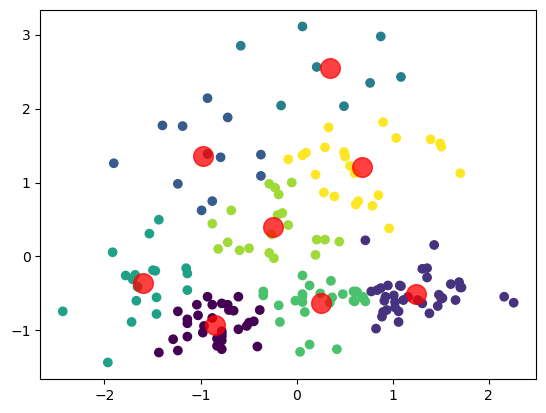

In [65]:
#dataset 작으니까 그냥 k = 8
# 4. K-means 클러스터링을 fitting하고, predict한 다음, 클러스터링 결과를 시각화 하세요. 
model = KMeans(n_clusters=8)
model.fit(scaled_feat)
pred = model.predict(scaled_feat)
print(pred)
feat_x = [i[0] for i in scaled_feat]
feat_y = [i[1] for i in scaled_feat]
print(feat_x)
print(feat_y)
plt.scatter(x=feat_x,y=feat_y,c=pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.75) #중심점 프린트


In [66]:
# 5. 클러스터 결과를 원본 데이터에 하나의 컬럼으로 추가하세요.  
wine['cluster'] = pred
print(wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  
0   3.92     1065        1  
1   3.40     1050        5  
2   3